## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [39]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [40]:
#проверяем наличие пропущенных значений в наборе данных
X.isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


Видим, что пропущенных значений нет, значит, и удалять ничего не надо.

In [41]:
#проверка столбцов на наличие категориальных признаков
(X.dtypes == "object").values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

Видим, что в столбцах признаки, которые не являются категориальными.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [42]:
#для начала отмасштабируем все признаки выборки при помощи StandardScaler
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_st_np = standard.fit_transform(X)
X_1 = pd.DataFrame(data=X_st_np, columns=X.columns)
X_1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [43]:
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, random_state = np.random.seed(1000), test_size = 0.3, stratify = y)
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
58,0.888627,-0.813595,0.487926,-0.839280,0.579852,1.770396,1.647239,-1.384766,0.786863,0.753498,-0.295924,0.364855,1.713598
34,0.629222,-0.481460,1.036228,-0.148624,0.720278,0.087948,0.502717,-0.578985,-0.089179,-0.371184,0.625418,0.364855,1.108544
82,-1.137207,-1.082894,0.524480,1.352801,-1.526548,-0.472868,-0.451052,0.307374,-0.334471,-1.236324,1.546759,0.152988,-0.372246
136,-0.927212,2.139716,0.634140,0.451946,-0.754202,-1.466313,-1.565455,1.354888,-1.385721,-0.522583,-0.910151,-1.895054,-0.085641
155,0.209232,2.561618,-0.170035,0.752231,-0.473348,-0.889474,-1.404820,1.999513,-0.071658,1.229325,-1.568252,-1.598441,-0.069719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,0.839217,-0.454530,-0.023821,-0.689137,0.298998,0.200111,0.663351,0.468530,0.664217,-0.526909,1.195772,0.364855,0.774172
62,0.826864,-0.975175,-1.632171,-0.448909,-0.403135,-0.312635,-0.240219,-0.337251,-1.508367,-0.544212,1.195772,-0.214247,-0.372246
142,0.641574,0.748338,1.292101,1.202658,-0.192495,-1.193917,-1.515257,1.113154,-1.823742,-0.306298,-0.295924,-0.779224,-0.722540
128,-0.778980,-0.634063,-0.243142,1.502943,-0.824415,-0.120355,0.422399,0.307374,0.541571,-1.270929,-0.295924,0.237735,-1.289380


Stratify необходим для создания качественных выборок (чтобы выборкам хватало всех значений), чтобы и в дальнейшем получать качественные результаты от модели.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [45]:
y_train

array([0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2,
       1, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0,
       2, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2,
       0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2])

In [46]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
58,0.888627,-0.813595,0.487926,-0.839280,0.579852,1.770396,1.647239,-1.384766,0.786863,0.753498,-0.295924,0.364855,1.713598
34,0.629222,-0.481460,1.036228,-0.148624,0.720278,0.087948,0.502717,-0.578985,-0.089179,-0.371184,0.625418,0.364855,1.108544
82,-1.137207,-1.082894,0.524480,1.352801,-1.526548,-0.472868,-0.451052,0.307374,-0.334471,-1.236324,1.546759,0.152988,-0.372246
136,-0.927212,2.139716,0.634140,0.451946,-0.754202,-1.466313,-1.565455,1.354888,-1.385721,-0.522583,-0.910151,-1.895054,-0.085641
155,0.209232,2.561618,-0.170035,0.752231,-0.473348,-0.889474,-1.404820,1.999513,-0.071658,1.229325,-1.568252,-1.598441,-0.069719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,0.839217,-0.454530,-0.023821,-0.689137,0.298998,0.200111,0.663351,0.468530,0.664217,-0.526909,1.195772,0.364855,0.774172
62,0.826864,-0.975175,-1.632171,-0.448909,-0.403135,-0.312635,-0.240219,-0.337251,-1.508367,-0.544212,1.195772,-0.214247,-0.372246
142,0.641574,0.748338,1.292101,1.202658,-0.192495,-1.193917,-1.515257,1.113154,-1.823742,-0.306298,-0.295924,-0.779224,-0.722540
128,-0.778980,-0.634063,-0.243142,1.502943,-0.824415,-0.120355,0.422399,0.307374,0.541571,-1.270929,-0.295924,0.237735,-1.289380


In [47]:
#объединяем признаки alcohol и magnesium из X_train в одну таблицу и преобразовываем в массив
x = pd.concat([X_train['alcohol'], X_train['magnesium']], join = 'outer', axis = 1)
x_tr = np.asarray(x).reshape(-1, 2)

In [48]:
#то же самое делаем с X_test
x_1 = pd.concat([X_test['alcohol'], X_test['magnesium']], join = 'outer', axis = 1)
x_te = np.asarray(x_1).reshape(-1, 2)

In [49]:
#обучаем первый классификатор с числом соседей 1
clf_1 = KNeighborsClassifier(n_neighbors=1, p=2)

clf_1.fit(x_tr, y_train) #обучаем модель на трейне
y_predicted_1 = clf_1.predict(x_te)
y_predicted_1

array([0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 1, 0,
       0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 2, 0, 1, 0, 1, 0, 1, 1, 2])

In [50]:
#доля правильных ответов
print("Accuracy is: ", np.mean(y_test == y_predicted_1))

Accuracy is:  0.7037037037037037


In [51]:
#обучаем первый классификатор с числом соседей 3
clf_3 = KNeighborsClassifier(n_neighbors=3, p=2)

clf_3.fit(x_tr, y_train) #обучаем модель на трейне
y_predicted_3 = clf_3.predict(x_te)
y_predicted_3

array([0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0,
       0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 2, 2, 1, 0, 1, 0, 2, 1, 2])

In [52]:
#доля правильных ответов
print("Accuracy is: ", np.mean(y_test == y_predicted_3))

Accuracy is:  0.6851851851851852


In [53]:
#обучаем первый классификатор с числом соседей 5
clf_5 = KNeighborsClassifier(n_neighbors=5, p=2)

clf_5.fit(x_tr, y_train) #обучаем модель на трейне
y_predicted_5 = clf_5.predict(x_te)
y_predicted_5

array([0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 2])

In [54]:
#доля правильных ответов
print("Accuracy is: ", np.mean(y_test == y_predicted_5))

Accuracy is:  0.6851851851851852


In [55]:
#обучаем первый классификатор с числом соседей 10
clf_10 = KNeighborsClassifier(n_neighbors=10, p=2)

clf_10.fit(x_tr, y_train) #обучаем модель на трейне
y_predicted_10 = clf_10.predict(x_te)
y_predicted_10

array([0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 2])

In [56]:
#доля правильных ответов
print("Accuracy is: ", np.mean(y_test == y_predicted_10))

Accuracy is:  0.6851851851851852


In [57]:
#обучаем первый классификатор с числом соседей 15
clf_15 = KNeighborsClassifier(n_neighbors=15, p=2)

clf_15.fit(x_tr, y_train) #обучаем модель на трейне
y_predicted_15 = clf_15.predict(x_te)
y_predicted_15

array([0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [58]:
#доля правильных ответов
print("Accuracy is: ", np.mean(y_test == y_predicted_15))

Accuracy is:  0.7407407407407407


In [59]:
#обучаем первый классификатор с числом соседей 25
clf_25 = KNeighborsClassifier(n_neighbors=25, p=2)

clf_25.fit(x_tr, y_train) #обучаем модель на трейне
y_predicted_25 = clf_25.predict(x_te)
y_predicted_25

array([0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [60]:
#доля правильных ответов
print("Accuracy is: ", np.mean(y_test == y_predicted_25))

Accuracy is:  0.7037037037037037


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [61]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [62]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

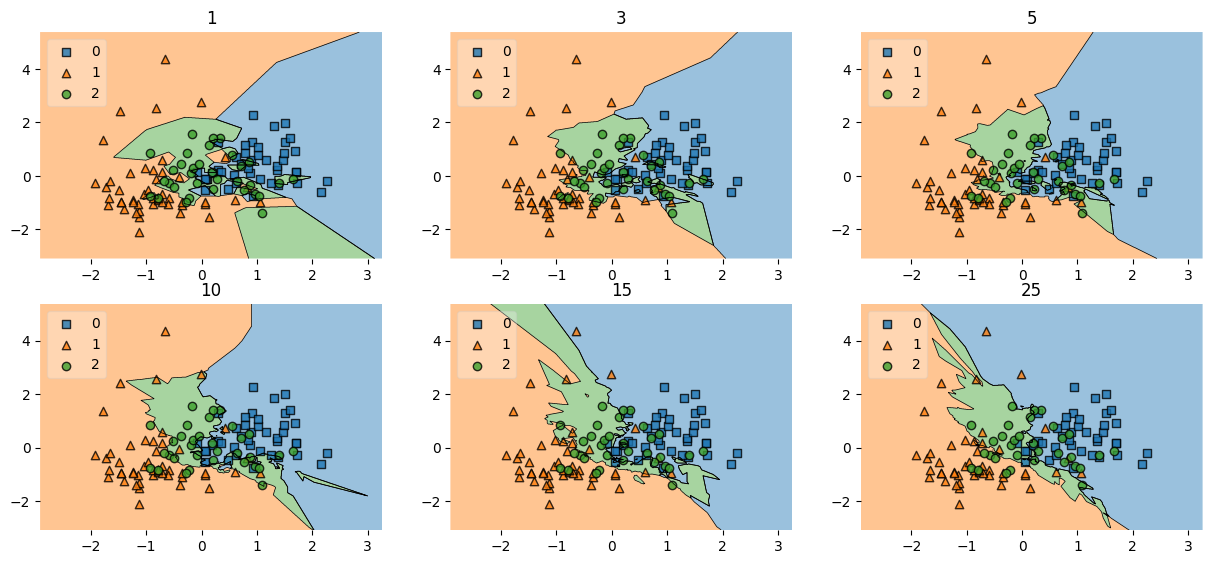

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

X = x_tr
y = y_train

gs = gridspec.GridSpec(3, 3)

fig = plt.figure(figsize=(15,10))

labels = ['1', '3', '5', '10', '15', '25']
for clf, lab, grd in zip([clf_1, clf_3, clf_5, clf_10, clf_15, clf_25],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X, y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Вывод: оптимальное число соседей - 15, так как при данном количестве максимальная доля правильных ответов, по графику наблюдаем то же самое.

### Задание 2: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [84]:
data = pd.read_csv('diamonds.csv')
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [85]:
#провереяем наличие пропусков
data.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


Наблюдаем 0 пропущенных значений

Столбец "unnamed: 0" не несёт доп. информации, а просто перечисляет строки, поэтому предлагаю его удалить

In [86]:
data.columns[[0]]

Index(['Unnamed: 0'], dtype='object')

In [87]:
data_new = data.drop(data.columns[[0]], axis=1)
data_new.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

Вещественные признаки: 'carat', 'depth', 'table', 'x', 'y', 'z'.
Целевая переменная: 'price'.

In [89]:
data_new.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Наблюдаем, что наибольшуюю корреляцию (сильную связь) с 'price' имеют 'carat', 'x', 'y', 'z'.

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [90]:
data_final = pd.get_dummies(data_new)
data_final

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [91]:
X1 = data_final.drop(data_final[['price']], axis=1) #объясняющие переменные
y1 = data_final['price'] #целевая переменная

In [92]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = np.random.seed(1000), test_size = 0.3)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [93]:
standard = StandardScaler()

X1_st_np = standard.fit_transform(X1_train)
X1_1 = pd.DataFrame(data=X1_st_np, columns=X1.columns)

X1_st_np_1 = standard.fit_transform(X1_test)
X1_t = pd.DataFrame(data=X1_st_np_1, columns=X1.columns)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X1_1, y1_train)

pred_train = lr.predict(X1_1)
pred_test = lr.predict(X1_t)

print(f"MSE на train: {mean_squared_error(y1_train, pred_train)}")
print(f"MSE на test: {mean_squared_error(y1_test, pred_test)}")

MSE на train: 1262929.3296126022
MSE на test: 1312704.0981619495


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [95]:
print('Веса признаков:')
for coef, feat in zip(lr.coef_, X1_1):
    print(f"{feat}: {coef}")
print("Свободный член:", lr.intercept_)

Веса признаков:
carat: 5329.196231151859
depth: -95.19764025656741
table: -53.025622875357286
x: -1140.350344276466
y: 6.555434736962865
z: -25.767730332143167
cut_Fair: -127.35212734549562
cut_Good: -49.71664194415299
cut_Ideal: 57.99956105363362
cut_Premium: 18.965281882906623
cut_Very Good: -1.719945045251207
color_D: 205.91072577755617
color_E: 158.90813960718037
color_F: 138.76364369444101
color_G: 60.37528933399763
color_H: -126.74978369057963
color_I: -251.15076309019784
color_J: -388.1019613979491
clarity_I1: -468.66882612425513
clarity_IF: 232.81184184010988
clarity_SI1: -148.88607872707652
clarity_SI2: -487.0458815097429
clarity_VS1: 203.51597209631714
clarity_VS2: 109.78426750966418
clarity_VVS1: 246.05969249580332
clarity_VVS2: 272.93725219161456
Свободный член: 3915.753005985487


На порядок превышают: 'carat', 'x'.

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [96]:
from sklearn.linear_model import Lasso, Ridge
lasso_lr = Lasso(10).fit(X1_1, y1_train)
ridge_lr = Ridge(10).fit(X1_1, y1_train)

pred_lasso_lr_train = lasso_lr.predict(X1_1)
pred_lasso_lr_test = lasso_lr.predict(X1_t)

pred_ridge_lr_train = ridge_lr.predict(X1_1)
pred_ridge_lr_test = ridge_lr.predict(X1_t)

print(f"MSE Lasso-регрессии на train: {mean_squared_error(y1_train, pred_lasso_lr_train)}")
print(f"MSE Lasso-регрессии на test: {mean_squared_error(y1_test, pred_lasso_lr_test)}")

print(f"MSE Ridge-регрессии на train: {mean_squared_error(y1_train, pred_ridge_lr_train)}")
print(f"MSE Ridge-регрессии на test: {mean_squared_error(y1_test, pred_ridge_lr_test)}")

MSE Lasso-регрессии на train: 1274368.3750917614
MSE Lasso-регрессии на test: 1324627.601971294
MSE Ridge-регрессии на train: 1262995.4978248891
MSE Ridge-регрессии на test: 1312844.1605252228


In [97]:
print('Веса признаков Lasso-регрессии:')

for coef, feat in zip(lasso_lr.coef_, X1_1):
  print(f"{feat}: {coef}")

print(f"Свободный член: {lasso_lr.intercept_}")

Веса признаков Lasso-регрессии:
carat: 4858.652352457434
depth: -62.02419889101741
table: -38.85498919432851
x: -673.3240319283794
y: -0.0
z: -36.38135377320275
cut_Fair: -129.3301936851353
cut_Good: -52.29075853289361
cut_Ideal: 47.23079326486983
cut_Premium: 0.0
cut_Very Good: -2.300599851867799
color_D: 139.0122972341886
color_E: 84.50372273972316
color_F: 64.11142232212701
color_G: -0.0
color_H: -173.10076813564692
color_I: -282.4129742978692
color_J: -405.9922946326843
clarity_I1: -487.27200800760215
clarity_IF: 178.9422980169328
clarity_SI1: -262.6693689547935
clarity_SI2: -576.9381334172056
clarity_VS1: 96.2414171415348
clarity_VS2: -0.0
clarity_VVS1: 174.7032593342194
clarity_VVS2: 189.6277213695409
Свободный член: 3915.753005985487


In [98]:
print('Веса признаков Ridgе-регрессии:')
for coef, feat in zip(ridge_lr.coef_, X1_1):
  print(f"{feat}: {coef}")

print(f"Свободный член: {ridge_lr.intercept_}")

Веса признаков Ridgе-регрессии:
carat: 5291.2240570875
depth: -92.58865873858406
table: -52.69409984646746
x: -1096.3954003368867
y: 3.519993163976604
z: -29.803176374732516
cut_Fair: -127.56661718019757
cut_Good: -49.838698879606234
cut_Ideal: 58.0194592484471
cut_Premium: 18.93849197691742
cut_Very Good: -1.5430719529037265
color_D: 205.68005949398426
color_E: 158.67283895515695
color_F: 138.29615204227153
color_G: 60.12030006638272
color_H: -126.4908245405523
color_I: -250.52830699449305
color_J: -387.33988442851046
clarity_I1: -468.2113501421144
clarity_IF: 233.18117267000278
clarity_SI1: -149.43201078511999
clarity_SI2: -486.9369822150597
clarity_VS1: 203.34314793197768
clarity_VS2: 109.63954169374826
clarity_VVS1: 246.52962094677386
clarity_VVS2: 273.20187448576365
Свободный член: 3915.753005985487


По сравнению с изначальными весами, коэффициенты сильно уменьшились в Lasso-регрессии и не очень сильно в Ridge-регрессии. Проблема мультиколлинеарности проявлялась достаточно сильно, что выявляется при сравнении коэффициентов изначальной и Lasso-регрессии, в которой проблемы, связанные с мультиколлинеарностью решаются.

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.497e+08, tolerance: 5.985e+07
  model = cd_fast.enet_coordinate_descent(


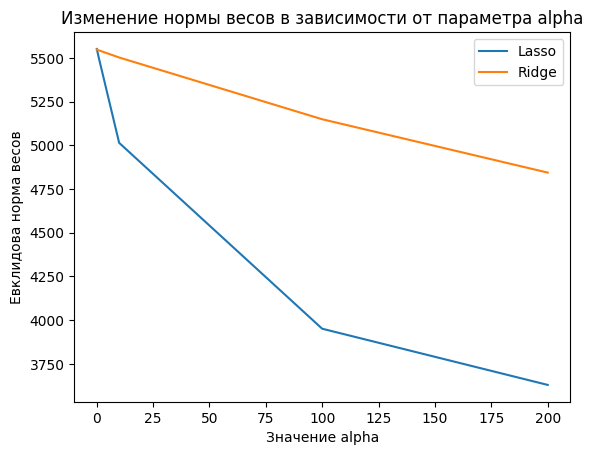

In [99]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norms = []
ridge_norms = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    ridge_model = Ridge(alpha=alpha)
    lasso_model.fit(X1_1, y1_train)
    ridge_model.fit(X1_1, y1_train)
    lasso_norms.append(np.linalg.norm(lasso_model.coef_))
    ridge_norms.append(np.linalg.norm(ridge_model.coef_))

plt.plot(alphas, lasso_norms, label='Lasso')
plt.plot(alphas, ridge_norms, label='Ridge')
plt.xlabel('Значение alpha')
plt.ylabel('Евклидова норма весов')
plt.title('Изменение нормы весов в зависимости от параметра alpha')
plt.legend()
plt.show()

Видим, что агрессивнее уменьшает веса Lasso-регрессия. Она часто используется, потому что умеет сжимать незначимые переменные до 0 и удялть их, что в основном приводит к улучшенным результатам.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [100]:
from sklearn.linear_model import LassoCV

lasso_cv_lr = LassoCV(cv=5).fit(X1_1, y1_train)

alphas = lasso_cv_lr.alphas_
mse_values = np.mean(lasso_cv_lr.mse_path_, axis=1)

optimal_alpha = alphas[np.argmin(mse_values)]
print(f"Оптимальная альфа: {optimal_alpha}")

Оптимальная альфа: 3.669405929759322


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [101]:
lasso_lr_2 = Lasso(optimal_alpha).fit(X1_1, y1_train)

print("Вещественные переменные:")
for coef, feat in zip(lasso_lr_2.coef_, X1_1):
  print(f"{feat}: {coef}")

print(f"Свободный член: {lasso_lr_2.intercept_}")

Вещественные переменные:
carat: 5155.650148826887
depth: -83.07239796714963
table: -47.85700263923806
x: -964.607124582687
y: -0.0
z: -29.133330439116328
cut_Fair: -132.77146506065708
cut_Good: -58.53183292349266
cut_Ideal: 40.619962001429954
cut_Premium: 0.0
cut_Very Good: -13.294089825585392
color_D: 150.0486886438959
color_E: 95.17183910886946
color_F: 75.38751117369112
color_G: -0.0
color_H: -177.78012453565336
color_I: -290.86365257552546
color_J: -415.58523935879475
clarity_I1: -495.15001804703417
clarity_IF: 183.27146890314805
clarity_SI1: -261.6232495077131
clarity_SI2: -582.0868373352431
clarity_VS1: 104.9203658639351
clarity_VS2: -0.0
clarity_VVS1: 178.32733384460184
clarity_VVS2: 194.1754457512329
Свободный член: 3915.753005985487


Наиболее информативные: 'carat', 'x'. Значит, имеют наибольшее влияние на цену камня.
Неинформативные: 'y', 'cut_Premium', 'color_G', 'clarty_VS2'. Значит, предполагаем, что данные признаки вообще не имеют влияния на цену.


**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [102]:
pred_lasso_lr_2 = lasso_lr_2.predict(X1_t)

print(f"MSE Lasso-регрессии: {mean_squared_error(y1_test, pred_lasso_lr_2)}")
print(f"MSE обычной линейной регрессии: {mean_squared_error(y1_test, pred_test)}")

MSE Lasso-регрессии: 1314472.9434641448
MSE обычной линейной регрессии: 1312704.0981619495


Для предсказаний лучше использовать обычную линейную регрессию, так как она выдает наименьшую MSE.